# Question_6: Plot how the average delay time evolves through the week

In [4]:
import src.data_processing.data as data
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
trips = data.full_trips

In [6]:
avg_delay = trips.groupby("Date of departure")["Delay time"].mean().reset_index()
avg_delay = pd.concat([avg_delay.iloc[1:], avg_delay.iloc[:1]])
avg_delay

,Date of departure,Delay time
1,2020-09-21,151.742627
2,2020-09-22,128.063268
3,2020-09-23,106.503931
4,2020-09-24,95.965393
5,2020-09-25,138.264277
6,2020-09-26,112.531570
0,2020-09-20,122.506815


In [7]:
avg_delay["Date of departure"] = pd.to_datetime(avg_delay["Date of departure"], format = '%Y-%m-%d').dt.day_name()

In [8]:
avg_delay

,Date of departure,Delay time
1,Monday,151.742627
2,Tuesday,128.063268
3,Wednesday,106.503931
4,Thursday,95.965393
5,Friday,138.264277
6,Saturday,112.531570
0,Sunday,122.506815


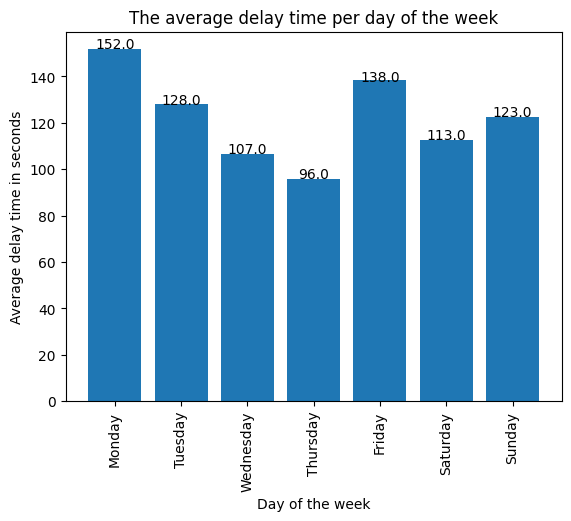

In [9]:
def addvaluelabels(x,y):
    for i in range(len(x)):
        plt.text(i, y.iloc[i], y.iloc[i], ha='center')
addvaluelabels(avg_delay["Date of departure"] , avg_delay["Delay time"].round(0))
plt.title('The average delay time per day of the week')
plt.xlabel("Day of the week")
plt.ylabel("Average delay time in seconds")
plt.bar(avg_delay["Date of departure"] , avg_delay["Delay time"])
plt.xticks(rotation=90)
plt.show()

# Extra insight: Is there a weekend effect?
# Is there extra delay when students go home or to their "student" city?
# we take a look in the most 5 most used stations

In [10]:
BigCities = trips[(trips["Name of the stop"] == "brussel-noord/bruxelles-nord") | (trips["Name of the stop"] == "brussel-zuid/bruxelles-midi") | (trips["Name of the stop"] == "brussel-centraal/bruxelles-central") | (trips["Name of the stop"] == "gent-sint-pieters") | (trips["Name of the stop"] == "antwerpen-centraal")]



avg_delay = BigCities.groupby("Date of departure")["Delay time"].mean().reset_index()
avg_delay = pd.concat([avg_delay.iloc[1:], avg_delay.iloc[:1]])
avg_delay



,Date of departure,Delay time
1,2020-09-21,153.495175
2,2020-09-22,135.042114
3,2020-09-23,103.080069
4,2020-09-24,85.096781
5,2020-09-25,140.171313
6,2020-09-26,117.713618
0,2020-09-20,143.982633


In [11]:
avg_delay["Date of departure"] = pd.to_datetime(avg_delay["Date of departure"], format = '%Y-%m-%d').dt.day_name()

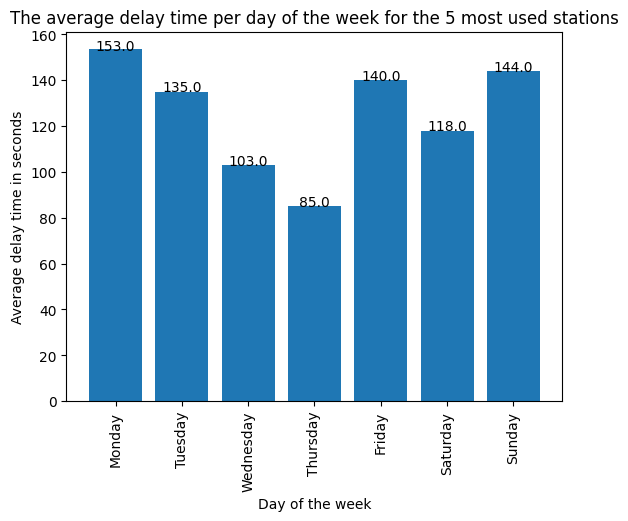

In [12]:
def addvaluelabels(x,y):
    for i in range(len(x)):
        plt.text(i, y.iloc[i], y.iloc[i], ha='center')
addvaluelabels(avg_delay["Date of departure"] , avg_delay["Delay time"].round(0))
plt.title('The average delay time per day of the week for the 5 most used stations')
plt.xlabel("Day of the week")
plt.ylabel("Average delay time in seconds")
plt.bar(avg_delay["Date of departure"] , avg_delay["Delay time"])
plt.xticks(rotation=90)
plt.show()